# Python packages
 
Creating a python environment:
```bash
conda create -y -n dda_validate -c conda-forge python \
ipython \
jupyter \
numpy \
numba \
pyparsing \
pillow \
shapely \
scipy \
matplotlib
```
Activate our environment:

```bash
conda activate dda_validate
```

Installing python packages:
```bash
pip install miepython
```
```bash
pip install PyMieScatt
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import miepython
import bhmie
import PyMieScatt as ps

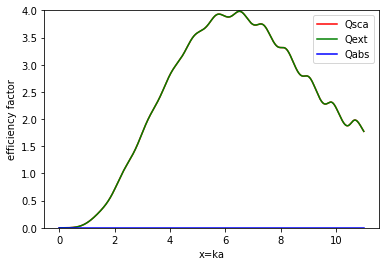

max: 3.9824232540624074 ind:  591
min: 1.1098881760912524e-17 ind:  0


In [6]:
m=1.33
x = np.linspace(0.0001, 11, 1001)


# NOTE: np.conj(m)
qext, qsca, qback, g = miepython.mie(np.conj(m), x)
qabs = qext - qsca

plt.plot(x, qsca, color='red', label='Qsca')
plt.plot(x, qext, color='green', label='Qext')
plt.plot(x, qabs, color='blue', label='Qabs')

plt.ylabel("efficiency factor")
# plt.yscale("log")
plt.ylim([0, 4.])
plt.xlabel("x=ka")
plt.legend()

plt.show()

print('max:' ,np.max(qsca), 'ind: ', np.argmax(qsca))
print('min:' ,np.min(qsca), 'ind: ', np.argmin(qsca))

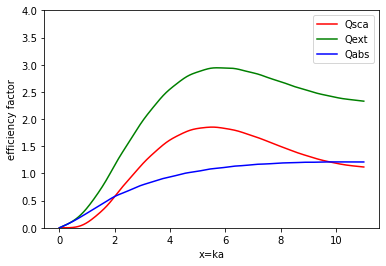

max: 1.8523961020016115 ind:  502
min: 1.2144250309858537e-17 ind:  0


In [7]:
m=1.33+0.1j
x = np.linspace(0.0001, 11, 1001)


# NOTE: np.conj(m)
qext, qsca, qback, g = miepython.mie(np.conj(m), x)
qabs = qext - qsca

plt.plot(x, qsca, color='red', label='Qsca')
plt.plot(x, qext, color='green', label='Qext')
plt.plot(x, qabs, color='blue', label='Qabs')

plt.ylabel("efficiency factor")
# plt.yscale("log")
plt.ylim([0, 4.])
plt.xlabel("x=ka")
plt.legend()

plt.show()

print('max:' ,np.max(qsca), 'ind: ', np.argmax(qsca))
print('min:' ,np.min(qsca), 'ind: ', np.argmin(qsca))

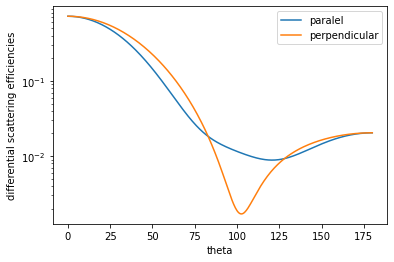

max: 0.7236331786510193 ind:  0.0
min: 0.006134531372457672 ind:  107.0


In [34]:
m=1.33
x=2.5

theta = np.linspace(0, np.pi, 2*180+1)
mu = np.cos(theta)

scat_unp = miepython.i_unpolarized(np.conj(m), x, mu)
scat_par = miepython.i_par(np.conj(m), x, mu)
scat_per = miepython.i_per(np.conj(m), x, mu)

qext, qsca, qback, g = miepython.mie(np.conj(m), x)

# print(np.pi * qext * x**2 / (np.pi * x**2))
scat_unp *=  qext 
scat_par *=  qext
scat_per *=  qext

angles = theta/np.pi*180
# plt.plot(angles, scat_unp, label='unpolarised')
plt.plot(angles, scat_par, label='paralel')
plt.plot(angles, scat_per, label='perpendicular')


plt.ylabel('differential scattering efficiencies')
plt.yscale("log")
# plt.ylim([-2, 1])
plt.xlabel("theta")
plt.legend()

plt.show()

print('max:' ,np.max(scat_unp), 'ind: ', angles[np.argmax(scat_unp)])
print('min:' ,np.min(scat_unp), 'ind: ', angles[np.argmin(scat_unp)])


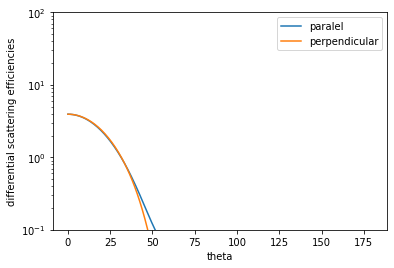

max: 3.934293944127011 ind:  0.0
min: 0.007861636960612328 ind:  104.50000000000001


In [92]:
m=1.33
x=4

theta = np.linspace(0, np.pi, 2*180+1)
mu = np.cos(theta)

scat_unp = miepython.i_unpolarized(np.conj(m), x, mu)
scat_par = miepython.i_par(np.conj(m), x, mu)
scat_per = miepython.i_per(np.conj(m), x, mu)

qext, qsca, qback, g = miepython.mie(np.conj(m), x)

# print(np.pi * qext * x**2 / (np.pi * x**2))
scat_unp *=  qext 
scat_par *=  qext 
scat_per *=  qext 

angles = theta/np.pi*180
# plt.plot(angles, scat_unp, label='unpolarised')
plt.plot(angles, scat_par, label='paralel')
plt.plot(angles, scat_per, label='perpendicular')


plt.ylabel('differential scattering efficiencies')
plt.yscale("log")
plt.ylim([1e-1, 1e2])
plt.xlabel("theta")
plt.legend()

plt.show()

print('max:' ,np.max(scat_unp), 'ind: ', angles[np.argmax(scat_unp)])
print('min:' ,np.min(scat_unp), 'ind: ', angles[np.argmin(scat_unp)])


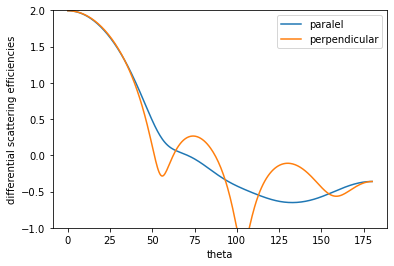

max: 98.87959161545784 ind:  0.0
min: 0.19758448736519743 ind:  104.50000000000001


In [97]:
m=1.33
x=4

theta = np.linspace(0, np.pi, 2*180+1)
mu = np.cos(theta)

scat_unp = miepython.i_unpolarized(np.conj(m), x, mu)
scat_par = miepython.i_par(np.conj(m), x, mu)
scat_per = miepython.i_per(np.conj(m), x, mu)

qext, qsca, qback, g = miepython.mie(np.conj(m), x)

# print(np.pi * qext * x**2 / (np.pi * x**2))
scat_unp *=  qext 
scat_par *=  qext
scat_per *=  qext

# Note: WHY this factor???? X**2 missing
scat_unp *= np.pi * x**2 / 2
scat_par *= np.pi * x**2 / 2
scat_per *= np.pi * x**2 / 2

angles = theta/np.pi*180
# plt.plot(angles, scat_unp, label='unpolarised')
plt.plot(angles, np.log10(scat_par), label='paralel')
plt.plot(angles, np.log10(scat_per), label='perpendicular')


plt.ylabel('differential scattering efficiencies')
# plt.yscale("log")
plt.ylim([-1, 2])
plt.xlabel("theta")
plt.legend()

plt.show()

print('max:' ,np.max(scat_unp), 'ind: ', angles[np.argmax(scat_unp)])
print('min:' ,np.min(scat_unp), 'ind: ', angles[np.argmin(scat_unp)])


In [77]:
def plot_differential_scattering_efficiencies_bhmie(m, x, ylims):

    N = 181
    theta = np.linspace(0, np.pi, 2*N-1)

    s1, s2, qext, qsca, qback, gsca = bhmie.bhmie(x, m, N)

    scat_par = np.abs(s2)**2
    scat_per = np.abs(s1)**2
    scat_unp = (scat_par+scat_per)/2

    # scat_unp /= np.pi * x**2
    # scat_par /= np.pi * x**2
    # scat_per /= np.pi * x**2

    # Note: WHY this factor???? X**2 missing
    scat_unp /= 2 
    scat_par /= 2
    scat_per /= 2

    angles = theta/np.pi*180
    # plt.plot(angles, np.log10(scat_unp), label='unpolarised')
    plt.plot(angles, np.log10(scat_par), label='paralel')
    plt.plot(angles, np.log10(scat_per), label='perpendicular')

    # plt.plot(angles, qsca/(4*np.pi)*np.ones_like(angles))

    plt.ylabel('differential scattering efficiencies')
    # plt.yscale("log")
    # plt.ylim([5e-3, max(scat)])
    plt.ylim(ylims)
    plt.xlabel("theta")
    plt.legend()

    plt.show()
    print('max:' ,np.max(scat_unp), 'ind: ', angles[np.argmax(scat_unp)])
    print('min:' ,np.min(scat_unp), 'ind: ', angles[np.argmin(scat_unp)])

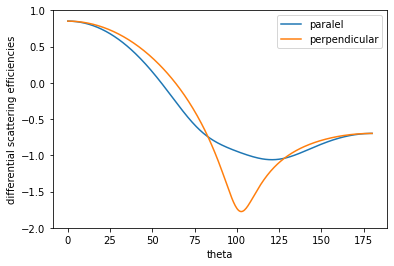

max: 7.104252130147132 ind:  0.0
min: 0.060225620992271335 ind:  107.0


In [79]:
m = 1.33+0j
x = 2.5

plot_differential_scattering_efficiencies_bhmie(m, x, [-2, 1])


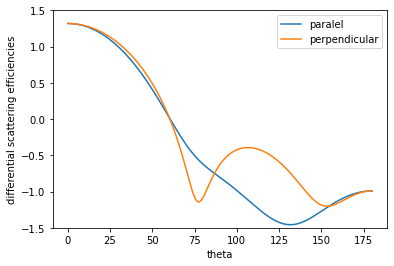

max: 20.848553801784057 ind:  0.0
min: 0.05934249662912802 ind:  149.0


In [81]:
m = 1.33+0j
x = 3

plot_differential_scattering_efficiencies_bhmie(m, x, [-1.5, 1.5])


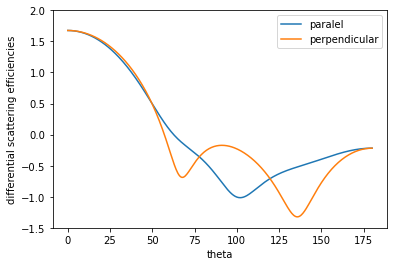

max: 47.45563239110365 ind:  0.0
min: 0.16717425844559006 ind:  130.5


In [82]:
m = 1.33+0j
x = 3.5

plot_differential_scattering_efficiencies_bhmie(m, x, [-1.5, 2])


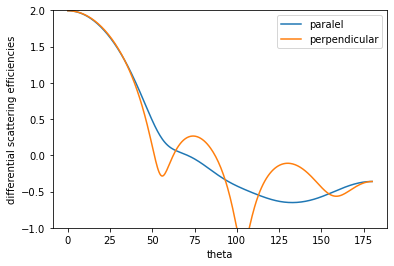

max: 98.87959162370308 ind:  0.0
min: 0.19758448723566222 ind:  104.50000000000001


In [83]:
m = 1.33+0j
x = 4

plot_differential_scattering_efficiencies_bhmie(m, x, [-1, 2])
